In [1]:
from __future__ import division, print_function
from numpy import abs, cos, sin, exp, sqrt, array, append, ceil, log2, arange, linspace
import matplotlib.pyplot as plt

<b>Problem 8.29 :</b><br>
8.29 Perform the same computation as in Sec. 8.3, but determine the value of L required for the circuit to dissipate to 1% of its original value in t = 0.05 s, given R = 280 $\Omega$, and C = ${10}^{-4}$ F.
Use (a) a graphical approach, (b) bisection, and (c) root location software such as the Excel Solver, the MATLAB function fzero, or the Mathcad function root.

<b>Problem 8.33 :</b><br>
8.33 Figure P8.33 shows a circuit with a resistor, an inductor, and a capacitor in parallel. Kirchhoff’s rules can be used to express the impedance of the system as

$$\frac{1}{Z} = \sqrt{\frac{1}{R^2} + ({\omega}{C} - \frac{1}{{\omega}{L}})^2}$$

where Z = impedance ($\Omega$) and $\omega$ = the angular frequency. Find the $\omega$ that results in an impedance of 75 $\Omega$ using both bisection and false position with initial guesses of 1 and 1000 for the following parameters: R = 225 $\Omega$, C = 0.6 x ${10}^{-6}$ F, and L = 0.5 H. Determine how many iterations of each technique are necessary to determine the answer to $\epsilon_s$ = 0.1%. Use the graphical approach to explain any diffi culties that arise.

![](img/circuit8_33.jpg)

<b>Numerical Methods :</b>

In [2]:
# Bisection Method
def bisection(fun, a, b, c, valerr=100, xtol=1e-6, ftol=1e-06, verbose=False):
# def bisection(fun, a, b, c, valerr=100, nmax=5000, ftol=1e-06, verbose=False):
    if fun(a) * fun(b) > 0:
        c = None
        msg = "The function should have a sign change in the interval."
    else:
        nmax = int(ceil(log2((b - a)/xtol)))
        ax = array([])
        acont = array([])
        avalerr = array([])
        for cont in range(nmax):

            ax = append(ax,c)
            acont = append(acont,cont)
            avalerr = append(avalerr,valerr)

            if verbose:
                print("n: {}, \tx: {}, \terr: {}%".format(cont, c,valerr))

            valp = c
            c = 0.5*(a + b)
            valf = c
            valerr = abs((valf - valp)/valf) * 100

            if abs(fun(c)) < ftol:
                msg = "Root found with desired accuracy."
                break
            elif fun(a) * fun(c) < 0:
                b = c
            elif fun(b) * fun(c) < 0:
                a = c
            msg = "Maximum number of iterations reached."
    return ax, avalerr, acont, msg

In [3]:
# False Position Method

def regula_falsi(fun, a, b, c, valerr=100, niter=5000, ftol=1e-06, verbose=False):
    if fun(a) * fun(b) > 0:
        c = None
        msg = "The function should have a sign change in the interval."
    else:
        ax = array([])
        acont = array([])
        avalerr = array([])
        for cont in range(niter):
            
            ax = append(ax,c)
            acont = append(acont,cont)
            avalerr = append(avalerr,valerr)
            
            qa = fun(a)
            qb = fun(b)
            valp = c
            c = (a*qb - b*qa)/(qb - qa)
            qc = fun(c)
            valf = c
            valerr = abs((valf - valp)/valf) * 100
            
            if verbose:
                print("n: {}, \tx: {}, \terr: {}%".format(cont, c,valerr))
                
            msg = "Maximum number of iterations reached."
            
            if abs(qc) < ftol:
                msg = "Root found with desired accuracy."
                break
            elif qa * qc < 0:
                b = c
            elif qb * qc < 0:
                a = c
    return ax, avalerr, acont, msg

In [4]:
# Newton-Raphson Method
def newton(fun, grad, x, valerr=100, niter=5000, ftol=1e-06, verbose=False):
    msg = "Maximum number of iterations reached."
    ax = array([])
    acont = array([])
    avalerr = array([])
    for cont in range(niter):
        if abs(grad(x)) < ftol:
            x = None
            msg = "Derivative near to zero."
            break
        
        if verbose:
            print("n: {}, \tx: {}, \terr: {}%".format(cont, x,valerr))
            
        ax = append(ax,x)
        acont = append(acont,cont)
        avalerr = append(avalerr,valerr)
        
        valp = x
        x = x - fun(x)/grad(x)
        valf = x
        valerr = abs((valf - valp)/valf) * 100
        
        if abs(fun(x)) < ftol:
            msg = "Root found with desired accuracy."
            break
    return ax, avalerr, acont, msg

In [5]:
# Secant Method
def secant(fun, xp, x, valerr=100, niter=5000, ftol=1e-06, verbose=False):
    msg = "Maximum number of iterations reached."
    ax = array([])
    acont = array([])
    avalerr = array([])
    for cont in range(niter):
        
        if verbose:
            print("n: {}, \tx: {}, \terr: {}%".format(cont, x,valerr))
            
        ax = append(ax,x)
        acont = append(acont,cont)
        avalerr = append(avalerr,valerr)
        
        valp = x
        x = x - ((x - xp)/(fun(x)-fun(xp)))*fun(x)
        valf = x
        valerr = abs((valf - valp)/valf) * 100
        
        if abs(fun(x)) < ftol:
            msg = "Root found with desired accuracy."
            break
    return ax, avalerr, acont, msg

<b>Solution Problem :</b> 

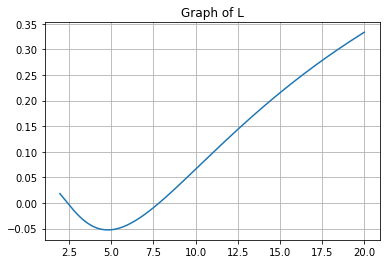

In [6]:
# Solution Problem 8.29
C = 1e-04
R = 280.0
t = 0.05
#q0/q(t)
qq0 = 0.01


def fun(L):
    eP = exp(-(R * t/(2 * L)))
    sq = ((1/(L * C)) - ((R/(2 * L))**2))**(1/2)
    result1 = eP * cos(sq * t) - qq0
    return result1


def grad(L):
    #not yet *t
    theta = sqrt((1/(L * C)) - (R/(2 * L))**2)
    eP = exp(-((R * t)/(2 * L)))
    eq1 = eP * (-(sin(theta * t))) * (((t/2) * ((R**2)/(2 * (L**3))) - (1/(C * (L**2))))/theta)
    eq2 = cos(theta * t) * eP * ((R * t)/(2 * (L**2)))
    result2 = eq1 + eq2
    return result2

x = arange(1.96,20,1e-4)

plt.title('Graph of L')
plt.plot(x, fun(x))
plt.grid()

In [7]:
# print("n: ", cont[-1], "\tx: ", x[-1], "\terr: ", err[-1], "%")
a = 7
b = 9
c = a
print("------------------------------------------------------------------------------------------------------")
print("bisection()")
x1 , err1, cont1, msg1 = bisection(fun, a, b, c, verbose=True)
# print(bisection(fun, 7, 9, 7))
print("------------------------------------------------------------------------------------------------------")
print("regula_falsi()")
x2 , err2, cont2, msg2 = regula_falsi(fun, a, b, c, verbose=True)
# print(regula_falsi(fun, 7, 9, 7))
print("------------------------------------------------------------------------------------------------------")
print("newton()")
x3 , err3, cont3, msg3 = newton(fun, grad, a, verbose=True)
# print(secant(fun, 7, 9))
print("------------------------------------------------------------------------------------------------------")
print("secant()")
x4 , err4, cont4, msg4 = secant(fun, a, b, verbose=True)
# print(secant(fun, 7, 9))
print("------------------------------------------------------------------------------------------------------")

------------------------------------------------------------------------------------------------------
bisection()
n: 0, 	x: 7, 	err: 100%
n: 1, 	x: 8.0, 	err: 12.5%
n: 2, 	x: 7.5, 	err: 6.666666666666667%
n: 3, 	x: 7.75, 	err: 3.225806451612903%
n: 4, 	x: 7.875, 	err: 1.5873015873015872%
n: 5, 	x: 7.8125, 	err: 0.8%
n: 6, 	x: 7.84375, 	err: 0.398406374501992%
n: 7, 	x: 7.828125, 	err: 0.19960079840319359%
n: 8, 	x: 7.8359375, 	err: 0.09970089730807577%
n: 9, 	x: 7.83984375, 	err: 0.04982561036372695%
n: 10, 	x: 7.841796875, 	err: 0.024906600249066%
n: 11, 	x: 7.8408203125, 	err: 0.012454851164528583%
n: 12, 	x: 7.84130859375, 	err: 0.006227037798119435%
n: 13, 	x: 7.841552734375, 	err: 0.0031134219620785205%
n: 14, 	x: 7.8414306640625, 	err: 0.0015567352149072964%
------------------------------------------------------------------------------------------------------
regula_falsi()
n: 0, 	x: 7.781634324026157, 	err: 10.044603633106032%
n: 1, 	x: 7.838153299303527, 	err: 0.72107514511602

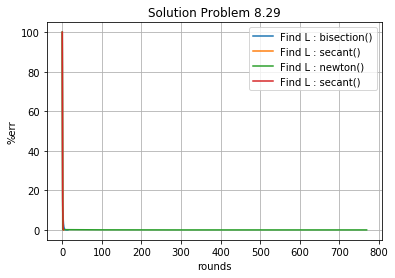

In [8]:
plt.plot(cont1, err1, label='Find L : bisection()')
plt.plot(cont2, err2, label='Find L : secant()')
plt.plot(cont3, err3, label='Find L : newton()')
plt.plot(cont4, err4, label='Find L : secant()')
plt.xlabel("rounds")
plt.ylabel("%err")
plt.title("Solution Problem 8.29")

plt.legend()
plt.grid()
plt.show()

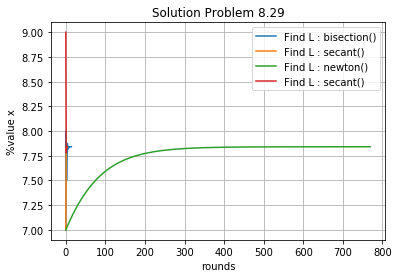

In [9]:
plt.plot(cont1, x1, label='Find L : bisection()')
plt.plot(cont2, x2, label='Find L : secant()')
plt.plot(cont3, x3, label='Find L : newton()')
plt.plot(cont4, x4, label='Find L : secant()')
plt.xlabel("rounds")
plt.ylabel("%value x")
plt.title("Solution Problem 8.29")

plt.legend()
plt.grid()
plt.show()

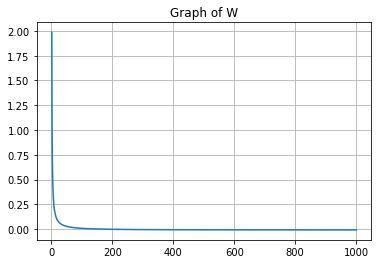

In [10]:
# Solution Problem 8.33
def fun(w):
    Z = 75  # impedance (ohm)
    # 1/Z = np.sqrt((1/R**2) + ((wC - (1/wL))**2))
    C = 0.6 * 1e-06  # (F)
    R = 225  # (ohm)
    L = 0.5  # (H)
    result = sqrt((1/R**2) + ((w*C - (1/(w*L)))**2)) - (1/Z)
    return result

w = linspace(1, 1000, 1101)

plt.title('Graph of W')
plt.plot(w, fun(w))
plt.grid()
plt.show()

In [11]:
# print("n: ", cont[-1], "\tx: ", x[-1], "\terr: ", err[-1], "%")
a = 1
b = 1000
c = a
print("------------------------------------------------------------------------------------------------------")
print("bisection()")
x1 , err1, cont1, msg1 = bisection(fun, a, b, c, verbose=True)
# print(bisection(fun, 7, 9, 7))
print("------------------------------------------------------------------------------------------------------")
print("regula_falsi()")
x2 , err2, cont2, msg2 = regula_falsi(fun, a, b, c, verbose=True)
# print(regula_falsi(fun, 7, 9, 7))
print("------------------------------------------------------------------------------------------------------")
print("newton()")
x3 , err3, cont3, msg3 = newton(fun, grad, a, verbose=True)
# print(secant(fun, 7, 9))
print("------------------------------------------------------------------------------------------------------")
print("secant()")
x4 , err4, cont4, msg4 = secant(fun, a, b, verbose=True)
# print(secant(fun, 7, 9))
print("------------------------------------------------------------------------------------------------------")

------------------------------------------------------------------------------------------------------
bisection()
n: 0, 	x: 1, 	err: 100%
n: 1, 	x: 500.5, 	err: 99.80019980019979%
n: 2, 	x: 250.75, 	err: 99.6011964107677%
n: 3, 	x: 125.875, 	err: 99.20556107249256%
n: 4, 	x: 188.3125, 	err: 33.15632260205775%
n: 5, 	x: 157.09375, 	err: 19.872687487567138%
n: 6, 	x: 172.703125, 	err: 9.038270152899665%
n: 7, 	x: 164.8984375, 	err: 4.733026957881272%
n: 8, 	x: 160.99609375, 	err: 2.4238748028630352%
n: 9, 	x: 159.044921875, 	err: 1.2268055163267062%
n: 10, 	x: 158.0693359375, 	err: 0.6171886101209046%
n: 11, 	x: 157.58154296875, 	err: 0.3095495573658231%
n: 12, 	x: 157.825439453125, 	err: 0.1545355965553567%
n: 13, 	x: 157.9473876953125, 	err: 0.07720814124684579%
n: 14, 	x: 157.88641357421875, 	err: 0.03861897912139696%
------------------------------------------------------------------------------------------------------
regula_falsi()
n: 0, 	x: 995.657427092578, 	err: 99.8995638486903

/home/nondevt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in sqrt



n: 52, 	x: nan, 	err: nan%
n: 53, 	x: nan, 	err: nan%
n: 54, 	x: nan, 	err: nan%
n: 55, 	x: nan, 	err: nan%
n: 56, 	x: nan, 	err: nan%
n: 57, 	x: nan, 	err: nan%
n: 58, 	x: nan, 	err: nan%
n: 59, 	x: nan, 	err: nan%
n: 60, 	x: nan, 	err: nan%
n: 61, 	x: nan, 	err: nan%
n: 62, 	x: nan, 	err: nan%
n: 63, 	x: nan, 	err: nan%
n: 64, 	x: nan, 	err: nan%
n: 65, 	x: nan, 	err: nan%
n: 66, 	x: nan, 	err: nan%
n: 67, 	x: nan, 	err: nan%
n: 68, 	x: nan, 	err: nan%
n: 69, 	x: nan, 	err: nan%
n: 70, 	x: nan, 	err: nan%
n: 71, 	x: nan, 	err: nan%
n: 72, 	x: nan, 	err: nan%
n: 73, 	x: nan, 	err: nan%
n: 74, 	x: nan, 	err: nan%
n: 75, 	x: nan, 	err: nan%
n: 76, 	x: nan, 	err: nan%
n: 77, 	x: nan, 	err: nan%
n: 78, 	x: nan, 	err: nan%
n: 79, 	x: nan, 	err: nan%
n: 80, 	x: nan, 	err: nan%
n: 81, 	x: nan, 	err: nan%
n: 82, 	x: nan, 	err: nan%
n: 83, 	x: nan, 	err: nan%
n: 84, 	x: nan, 	err: nan%
n: 85, 	x: nan, 	err: nan%
n: 86, 	x: nan, 	err: nan%
n: 87, 	x: nan, 	err: nan%
n: 88, 	x: nan, 	err: nan%


n: 1901, 	x: nan, 	err: nan%
n: 1902, 	x: nan, 	err: nan%
n: 1903, 	x: nan, 	err: nan%
n: 1904, 	x: nan, 	err: nan%
n: 1905, 	x: nan, 	err: nan%
n: 1906, 	x: nan, 	err: nan%
n: 1907, 	x: nan, 	err: nan%
n: 1908, 	x: nan, 	err: nan%
n: 1909, 	x: nan, 	err: nan%
n: 1910, 	x: nan, 	err: nan%
n: 1911, 	x: nan, 	err: nan%
n: 1912, 	x: nan, 	err: nan%
n: 1913, 	x: nan, 	err: nan%
n: 1914, 	x: nan, 	err: nan%
n: 1915, 	x: nan, 	err: nan%
n: 1916, 	x: nan, 	err: nan%
n: 1917, 	x: nan, 	err: nan%
n: 1918, 	x: nan, 	err: nan%
n: 1919, 	x: nan, 	err: nan%
n: 1920, 	x: nan, 	err: nan%
n: 1921, 	x: nan, 	err: nan%
n: 1922, 	x: nan, 	err: nan%
n: 1923, 	x: nan, 	err: nan%
n: 1924, 	x: nan, 	err: nan%
n: 1925, 	x: nan, 	err: nan%
n: 1926, 	x: nan, 	err: nan%
n: 1927, 	x: nan, 	err: nan%
n: 1928, 	x: nan, 	err: nan%
n: 1929, 	x: nan, 	err: nan%
n: 1930, 	x: nan, 	err: nan%
n: 1931, 	x: nan, 	err: nan%
n: 1932, 	x: nan, 	err: nan%
n: 1933, 	x: nan, 	err: nan%
n: 1934, 	x: nan, 	err: nan%
n: 1935, 	x: n

n: 3500, 	x: nan, 	err: nan%
n: 3501, 	x: nan, 	err: nan%
n: 3502, 	x: nan, 	err: nan%
n: 3503, 	x: nan, 	err: nan%
n: 3504, 	x: nan, 	err: nan%
n: 3505, 	x: nan, 	err: nan%
n: 3506, 	x: nan, 	err: nan%
n: 3507, 	x: nan, 	err: nan%
n: 3508, 	x: nan, 	err: nan%
n: 3509, 	x: nan, 	err: nan%
n: 3510, 	x: nan, 	err: nan%
n: 3511, 	x: nan, 	err: nan%
n: 3512, 	x: nan, 	err: nan%
n: 3513, 	x: nan, 	err: nan%
n: 3514, 	x: nan, 	err: nan%
n: 3515, 	x: nan, 	err: nan%
n: 3516, 	x: nan, 	err: nan%
n: 3517, 	x: nan, 	err: nan%
n: 3518, 	x: nan, 	err: nan%
n: 3519, 	x: nan, 	err: nan%
n: 3520, 	x: nan, 	err: nan%
n: 3521, 	x: nan, 	err: nan%
n: 3522, 	x: nan, 	err: nan%
n: 3523, 	x: nan, 	err: nan%
n: 3524, 	x: nan, 	err: nan%
n: 3525, 	x: nan, 	err: nan%
n: 3526, 	x: nan, 	err: nan%
n: 3527, 	x: nan, 	err: nan%
n: 3528, 	x: nan, 	err: nan%
n: 3529, 	x: nan, 	err: nan%
n: 3530, 	x: nan, 	err: nan%
n: 3531, 	x: nan, 	err: nan%
n: 3532, 	x: nan, 	err: nan%
n: 3533, 	x: nan, 	err: nan%
n: 3534, 	x: n

n: 4998, 	x: nan, 	err: nan%
n: 4999, 	x: nan, 	err: nan%
------------------------------------------------------------------------------------------------------
secant()
n: 0, 	x: 1000, 	err: 100%
n: 1, 	x: 995.6574270925779, 	err: 0.4361513096028275%
n: 2, 	x: 991.3354265145581, 	err: 0.4359776179103735%
n: 3, 	x: 987.033909811654, 	err: 0.43580232250834483%
n: 4, 	x: 982.752788880704, 	err: 0.4356254166244543%
n: 5, 	x: 978.491975968559, 	err: 0.4354468934635255%
n: 6, 	x: 974.2513836709658, 	err: 0.4352667462082281%
n: 7, 	x: 970.0309249314469, 	err: 0.43508496801967095%
n: 8, 	x: 965.8305130401767, 	err: 0.43490155203819236%
n: 9, 	x: 961.650061632854, 	err: 0.4347164913840317%
n: 10, 	x: 957.489484689571, 	err: 0.434529779158034%
n: 11, 	x: 953.3486965336793, 	err: 0.43434140844239966%
n: 12, 	x: 949.2276118306527, 	err: 0.4341513723014087%
n: 13, 	x: 945.1261455869462, 	err: 0.43395966378216577%
n: 14, 	x: 941.0442131488537, 	err: 0.4337662759153305%
n: 15, 	x: 936.9817302013613,

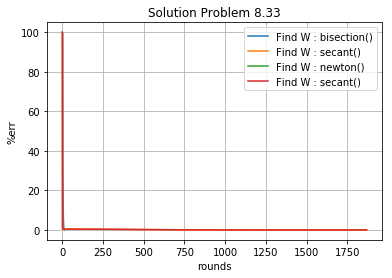

In [12]:
plt.plot(cont1, err1, label='Find W : bisection()')
plt.plot(cont2, err2, label='Find W : secant()')
plt.plot(cont3, err3, label='Find W : newton()')
plt.plot(cont4, err4, label='Find W : secant()')
plt.xlabel("rounds")
plt.ylabel("%err")
plt.title("Solution Problem 8.33")

plt.legend()
plt.grid()
plt.show()

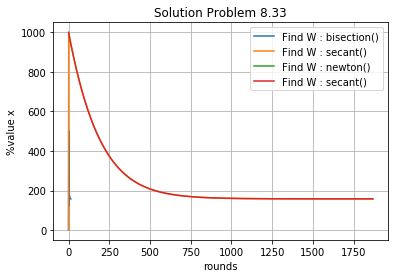

In [13]:
plt.plot(cont1, x1, label='Find W : bisection()')
plt.plot(cont2, x2, label='Find W : secant()')
plt.plot(cont3, x3, label='Find W : newton()')
plt.plot(cont4, x4, label='Find W : secant()')
plt.xlabel("rounds")
plt.ylabel("%value x")
plt.title("Solution Problem 8.33")

plt.legend()
plt.grid()
plt.show()

<b>Summary :</b>
![](img/summary.jpg)